이 데이터셋은 와인 품절 예측 데이터싯이다.

URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/

전체 데이터의 80%를 학습용 데이터로, 나머지 20%를 검증용 데이터로 사용한다.


In [ ]:
#이전의 의사결정나무 모델 데이터 분석
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("WineQT.csv").dropna()
data.info()

In [4]:
data = data.drop("Id", axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data = pd.DataFrame(data=data)
wine_data.head(10)
wine_data.drop

<bound method DataFrame.drop of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075

In [6]:
x_data = wine_data.iloc[:,:11]
y_label = wine_data.iloc[:,11:12]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_label,
                                                   test_size = 0.2, random_state=14)

In [7]:
x_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [8]:
y_label

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


In [9]:
y_label.value_counts()

quality
5          483
6          462
7          143
4           33
8           16
3            6
dtype: int64

In [10]:
#Train Model,Select Model
rf_clf = RandomForestClassifier(random_state=0)
dt_clf = DecisionTreeClassifier()

rf_clf.fit(x_train,y_train)
dt_clf.fit(x_train,y_train)

/Users/xinyuansong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


DecisionTreeClassifier()

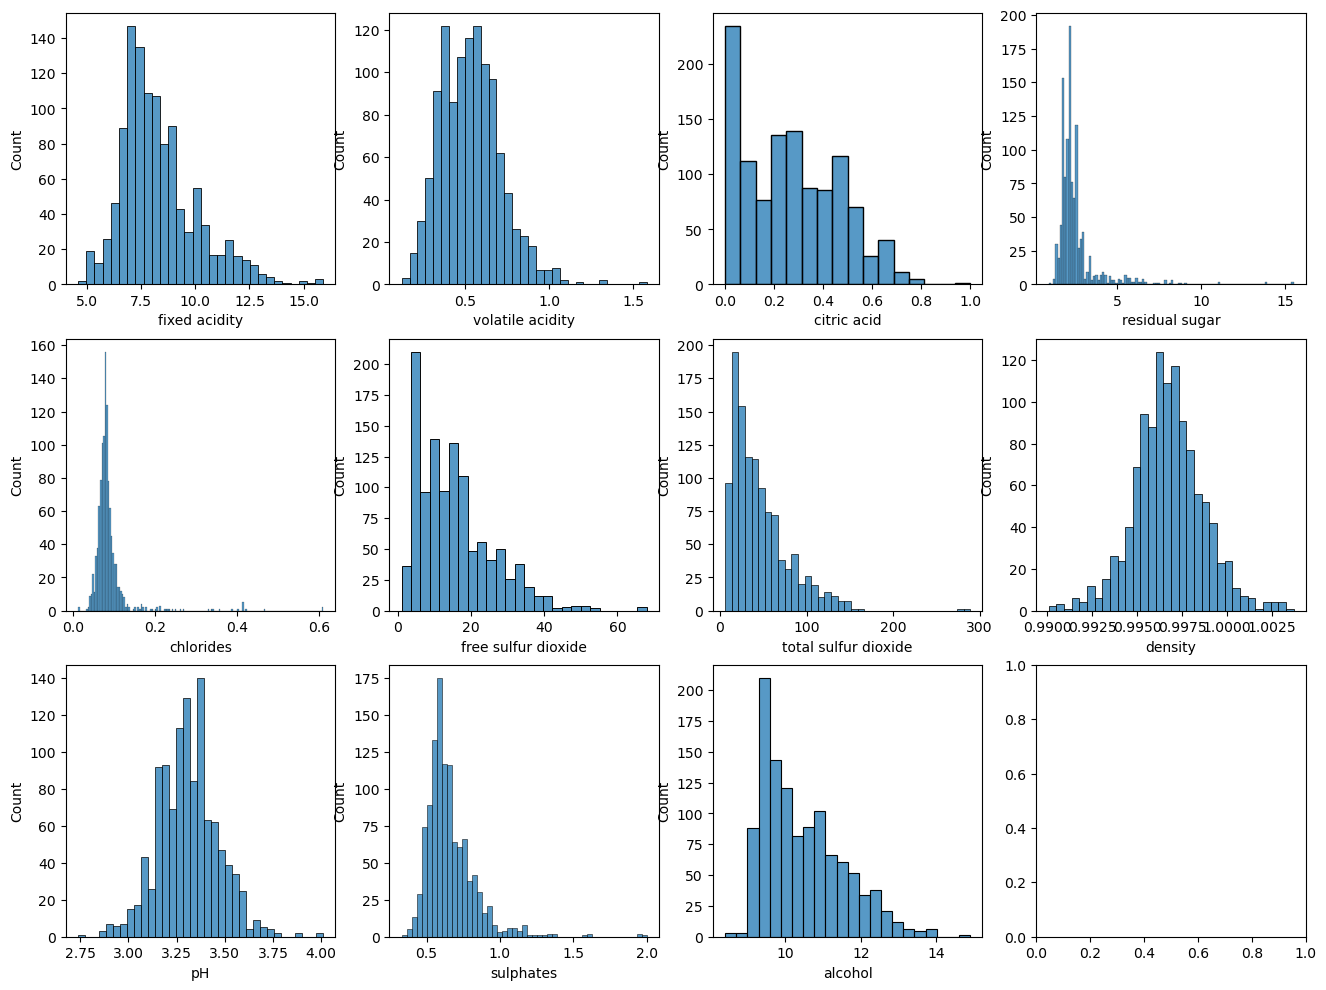

In [13]:
figure, axs = plt.subplots(3, 4)
figure.set_size_inches(16, 12)

cols = X.columns

for i in range(3):
    for j in range(4):
        if (4*i+j)<11:
            sns.histplot(X[cols[4*i+j]], ax=axs[i, j])

<Axes: xlabel='quality', ylabel='Count'>

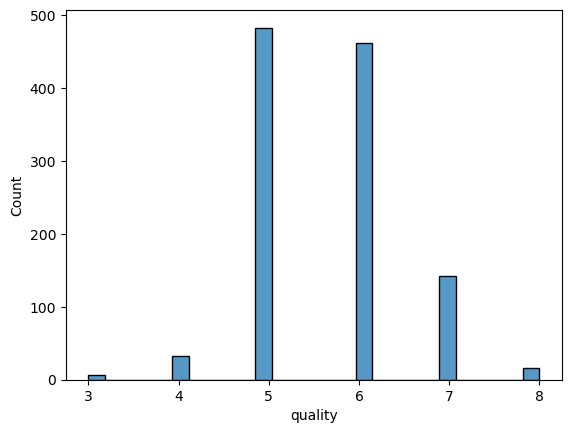

In [14]:
sns.histplot(y)

In [15]:
#의사결정나무의 계산선능
rf_pred = rf_clf.predict(x_test)
dt_pred = dt_clf.predict(x_test)

print(accuracy_score(y_test,rf_pred))
print(accuracy_score(y_test,dt_pred))

0.7117903930131004
0.5851528384279476


In [16]:
#딥러닝 모델 DNN 
import numpy as np 
import pandas as pd 

import torch
import torch.nn as nn

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [18]:
#데이터 전처리
df = pd.read_csv('WineQT.csv')

df.shape
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [19]:
df.drop(df.columns[0], axis=1, inplace=True)

df.drop(df.columns[4], axis=1, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1143 non-null   float64
 1   citric acid           1143 non-null   float64
 2   residual sugar        1143 non-null   float64
 3   chlorides             1143 non-null   float64
 4   total sulfur dioxide  1143 non-null   float64
 5   density               1143 non-null   float64
 6   pH                    1143 non-null   float64
 7   sulphates             1143 non-null   float64
 8   alcohol               1143 non-null   float64
 9   quality               1143 non-null   int64  
 10  Id                    1143 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 98.4 KB


In [20]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [21]:
#전체 데이터의 80%를 학습용 데이터로, 나머지 20%를 검증용 데이터로 사용
df_train, df_val = train_test_split(df, test_size=0.2)
X_train = df_train.drop(['quality', 'Id'], axis=1)
X_val = df_val.drop(['quality', 'Id'], axis=1)

y_train = df_train['quality']
y_val = df_val['quality']

In [22]:
# Scaling
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [23]:
# To Tensor
X_train_ts = torch.FloatTensor(X_train)
X_val_ts = torch.FloatTensor(X_val)

y_train_ts = torch.LongTensor(y_train.values)
y_val_ts = torch.LongTensor(y_val.values)

In [24]:
# Hyperparameter
LR = 1e-3
N_EPOCH = 5000
DROP_PROB = 0.3

In [25]:
# Model(모델에는 2개의 은닉층,ReLU 활성화 함수)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        
        self.fc1 = nn.Linear(X_train_ts.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 11)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=DROP_PROB)
        
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight.data)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        output = self.fc4(x)
        return output

In [26]:
model = DNN()

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

In [27]:
for epoch in range(1, N_EPOCH+1):
    model.train()
    out = model(X_train_ts)
    loss = loss_fn(out, y_train_ts)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    acc = (torch.argmax(out, dim=1) == y_train_ts).float().mean().item()
    
    model.eval()
    with torch.no_grad():
        out_val = model(X_val_ts)
        loss_val = loss_fn(out_val, y_val_ts)
        acc_val = (torch.argmax(out_val, dim=1) == y_val_ts).float().mean().item()
    
    if epoch % 200 == 0:
        print('Epoch : {:3d} / {}, Loss : {:.4f}, Accuracy : {:.2f} %, Val Loss : {:.4f}, Val Accuracy : {:.2f} %'.format(
            epoch, N_EPOCH, loss.item(), acc*100, loss_val.item(), acc_val*100))

Epoch : 200 / 5000, Loss : 0.9671, Accuracy : 60.61 %, Val Loss : 0.8845, Val Accuracy : 62.45 %
Epoch : 400 / 5000, Loss : 0.8568, Accuracy : 65.54 %, Val Loss : 0.8761, Val Accuracy : 63.32 %
Epoch : 600 / 5000, Loss : 0.8104, Accuracy : 65.54 %, Val Loss : 0.9115, Val Accuracy : 64.19 %
Epoch : 800 / 5000, Loss : 0.7460, Accuracy : 70.90 %, Val Loss : 0.9246, Val Accuracy : 65.94 %
Epoch : 1000 / 5000, Loss : 0.6993, Accuracy : 70.02 %, Val Loss : 0.9515, Val Accuracy : 66.38 %
Epoch : 1200 / 5000, Loss : 0.6249, Accuracy : 72.76 %, Val Loss : 0.9770, Val Accuracy : 65.07 %
Epoch : 1400 / 5000, Loss : 0.5891, Accuracy : 74.29 %, Val Loss : 0.9971, Val Accuracy : 66.38 %
Epoch : 1600 / 5000, Loss : 0.5498, Accuracy : 76.91 %, Val Loss : 1.0533, Val Accuracy : 66.38 %
Epoch : 1800 / 5000, Loss : 0.4811, Accuracy : 80.53 %, Val Loss : 1.1230, Val Accuracy : 66.81 %
Epoch : 2000 / 5000, Loss : 0.4747, Accuracy : 79.54 %, Val Loss : 1.1709, Val Accuracy : 66.38 %
Epoch : 2200 / 5000, Los

Accuracy 는 훌륭하지만 Val Accuracy 는 그렇지 못하다.그래서 더 많은 dataset을 추가해서 학습률을 올릴 수 있겠다.위의 quality 분표표를 보면 5,6 점대가 가장 많아서 3과 8쪽에 분포가 부족해서 계층적 샘플링 - stratified sampling을 사용해서 편향을 줄인다.그리고 오버피팅을 줄이는법을 적용한다.

In [28]:
##딥러닝 모델 NN 
import numpy as np
import torch 
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

In [29]:
class TensorData(Dataset):
    
    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.LongTensor(y_data)
        self.len = self.y_data.shape[0]
    
    def __getitem__(self,index):
        return self.x_data[index], self.y_data[index] 
    
    def __len__(self):
        return self.len

In [30]:
#분류문제를 위해 품절이 0,1,2,3,4,5로 치환
y_train
y_train.replace(3,0,inplace=True)
y_train.replace(4,1,inplace=True)
y_train.replace(5,2,inplace=True)
y_train.replace(6,3,inplace=True)
y_train.replace(7,4,inplace=True)
y_train.replace(8,5,inplace=True)

In [31]:
y_train.value_counts()

3    377
2    376
4    112
1     30
5     14
0      5
Name: quality, dtype: int64

In [32]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
661,6.6,0.610,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5
1069,6.9,0.740,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5
397,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
766,7.9,0.190,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.2
119,6.8,0.630,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.4
...,...,...,...,...,...,...,...,...,...,...,...
668,8.3,0.280,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4
746,11.6,0.230,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9
327,11.5,0.315,0.54,2.1,0.084,5.0,15.0,0.99870,2.98,0.70,9.2
406,8.7,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0


In [33]:
x_train2 = x_train.to_numpy()
y_train2 = y_train.to_numpy()
x_val2 = x_test.to_numpy()
y_val2 = y_test.to_numpy()

In [34]:
trainsets= TensorData(x_train2, y_train2)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size=32, shuffle=True)

validsets = TensorData(x_val2, y_val2)
vaildloader = torch.utils.data.DataLoader(validsets, batch_size=32, shuffle=True)

In [35]:
#NN 생성
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(11, 64, bias=True) 
        self.fc2 = nn.Linear(64, 64, bias=True) 
        self.fc3 = nn.Linear(64, 6, bias=False)
        self.dropout = nn.Dropout(0.2) 

    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [36]:
model_nr = Regressor()
print(model_nr)

Regressor(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=6, bias=False)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [43]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_nr.parameters(), lr=0.001)

In [48]:
loss_ = []
n = len(trainloader)
for epoch in range(500):
    running_loss =0.0 
    for data in trainloader:
        inputs, values = data
        optimizer.zero_grad()
        outputs = model_nr(inputs)
        loss = criterion(outputs, values.squeeze()) 
       
        loss.backward()
        optimizer.step()
        

print('Finished Training')

Finished Training


In [54]:
model_nr.eval()
correct = 0
total = 0
running_accuracy = 0.0 
best_accuracy = 0.0 
predictions = torch.tensor([], dtype=torch.float)  
actual = torch.tensor([], dtype=torch.float)

with torch.no_grad(): 
    for data in trainloader:

        inputs, values = data 
        outputs = model_nr(inputs) 
        _, predicted = torch.max(outputs, 1) 
        total += outputs.size(0) 
        running_accuracy += (predicted.reshape(-1,1) == values).sum().item()

accuracy = 100 * running_accuracy /total/15
print("Accuracy = {}".format(accuracy))
model_nr.train()

Accuracy = 85.70386579139314


Regressor(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=6, bias=False)
  (dropout): Dropout(p=0.2, inplace=False)
)

의사결정나무의 결과 Accuracy :71.17903930131004%
               58.51528384279476%
DNN의 결과 Accuracy : 89.93 %, Val Accuracy : 66.38 %
NN의 결과 Accuracy : 85.70386579139314%

지금까지 보고 수치적으로 NN의 결과 제일 좋다.외인 품절의 판정 정확도가 86%된다.